In [1]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel("D:\\tweets_live.xlsx")

In [3]:
df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0
5,@PopCrave,2024-01-12T16:15:50.000Z,Taylor Swift and Travis Kelce are reportedly p...,963.0,4.5K,18K,3.3M,0.0
6,@iluminatibot,2024-01-11T16:24:41.000Z,George Soros owns Taylor Swift’s music but the...,505.0,2.2K,9.3K,723K,0.0
7,@hollyhollssss,2024-01-11T04:34:44.000Z,this picture always kills me like taylor swift...,31.0,743,23K,448K,0.0
8,@FoxNews,2024-01-13T14:21:16.000Z,Tony Dungy says Taylor Swift has 'disenchanted...,394.0,115,739,642K,1.0
9,@evermoresflower,2024-01-12T00:06:46.000Z,"""Taylor Swift-""\nMe:",12.0,578,3.4K,59K,0.0


In [ ]:
# df = df.drop(['Sentimen'], axis=1)

In [4]:
df.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0


In [5]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
    'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True, # fix HTML tokens
    
    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",
    
    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",
    
    unpack_hashtags=True, # perform word segmentation on hashtags
    unpack_contractions=True, # Unpack contractions (can't -> can not)
    spell_correct_elong=False, # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


In [6]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
    
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')
    
def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub(r'\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()
    
def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [7]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [8]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [9]:
df["step01"] = final_string

In [10]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments,step01
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0,we can all agree that taylor swift is witch ri...
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0,joshua in his lover era by taylor swift
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0,joshua tonight there taylor swift song here so...
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0,director said take five but taylor swift heard...
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0,taylor swift
5,@PopCrave,2024-01-12T16:15:50.000Z,Taylor Swift and Travis Kelce are reportedly p...,963.0,4.5K,18K,3.3M,0.0,taylor swift and travis kelce are reportedly p...
6,@iluminatibot,2024-01-11T16:24:41.000Z,George Soros owns Taylor Swift’s music but the...,505.0,2.2K,9.3K,723K,0.0,george soros owns taylor swift music but the d...
7,@hollyhollssss,2024-01-11T04:34:44.000Z,this picture always kills me like taylor swift...,31.0,743,23K,448K,0.0,this picture always kills me like taylor swift...
8,@FoxNews,2024-01-13T14:21:16.000Z,Tony Dungy says Taylor Swift has 'disenchanted...,394.0,115,739,642K,1.0,tony dungy says taylor swift has disenchanted ...
9,@evermoresflower,2024-01-12T00:06:46.000Z,"""Taylor Swift-""\nMe:",12.0,578,3.4K,59K,0.0,taylor swift me


In [11]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [12]:
df_new = df[~df.isin(df_hapus)].dropna()

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 51
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserTags    49 non-null     object 
 1   TimeStamps  49 non-null     object 
 2   Tweets      49 non-null     object 
 3   Replys      49 non-null     float64
 4   reTweets    49 non-null     object 
 5   Likes       49 non-null     object 
 6   Views       49 non-null     object 
 7   Sentiments  49 non-null     float64
 8   step01      49 non-null     object 
dtypes: float64(2), object(7)
memory usage: 3.8+ KB


In [ ]:
# nltk.download('punkt')

In [14]:
# token
import nltk
from nltk.tokenize import word_tokenize

In [15]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [16]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [17]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments,step01,tokens
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0,we can all agree that taylor swift is witch ri...,"[we, can, all, agree, that, taylor, swift, is,..."
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0,joshua in his lover era by taylor swift,"[joshua, in, his, lover, era, by, taylor, swift]"
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0,joshua tonight there taylor swift song here so...,"[joshua, tonight, there, taylor, swift, song, ..."
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0,director said take five but taylor swift heard...,"[director, said, take, five, but, taylor, swif..."
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0,taylor swift,"[taylor, swift]"
5,@PopCrave,2024-01-12T16:15:50.000Z,Taylor Swift and Travis Kelce are reportedly p...,963.0,4.5K,18K,3.3M,0.0,taylor swift and travis kelce are reportedly p...,"[taylor, swift, and, travis, kelce, are, repor..."
6,@iluminatibot,2024-01-11T16:24:41.000Z,George Soros owns Taylor Swift’s music but the...,505.0,2.2K,9.3K,723K,0.0,george soros owns taylor swift music but the d...,"[george, soros, owns, taylor, swift, music, bu..."
7,@hollyhollssss,2024-01-11T04:34:44.000Z,this picture always kills me like taylor swift...,31.0,743,23K,448K,0.0,this picture always kills me like taylor swift...,"[this, picture, always, kills, me, like, taylo..."
8,@FoxNews,2024-01-13T14:21:16.000Z,Tony Dungy says Taylor Swift has 'disenchanted...,394.0,115,739,642K,1.0,tony dungy says taylor swift has disenchanted ...,"[tony, dungy, says, taylor, swift, has, disenc..."
9,@evermoresflower,2024-01-12T00:06:46.000Z,"""Taylor Swift-""\nMe:",12.0,578,3.4K,59K,0.0,taylor swift me,"[taylor, swift, me]"


In [ ]:
# normalized_word = pd.read_csv('kamus_alzami_clean.csv', sep=",")

# normalized_word_dict = {}

# for index, row in normalized_word.iterrows():
#     if row[0] not in normalized_word_dict:
#         normalized_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [ ]:
# df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [ ]:
# i=0
# final_string_tokens = []
# for text in df_new['final_tokens'].values:
#     EachReviewText = ""
#     EachReviewText = ' '.join(text)
#     final_string_tokens.append(EachReviewText)

In [ ]:
# df_new["step02"] = final_string_tokens

In [18]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments,step01,tokens
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0,we can all agree that taylor swift is witch ri...,"[we, can, all, agree, that, taylor, swift, is,..."
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0,joshua in his lover era by taylor swift,"[joshua, in, his, lover, era, by, taylor, swift]"
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0,joshua tonight there taylor swift song here so...,"[joshua, tonight, there, taylor, swift, song, ..."
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0,director said take five but taylor swift heard...,"[director, said, take, five, but, taylor, swif..."
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0,taylor swift,"[taylor, swift]"
5,@PopCrave,2024-01-12T16:15:50.000Z,Taylor Swift and Travis Kelce are reportedly p...,963.0,4.5K,18K,3.3M,0.0,taylor swift and travis kelce are reportedly p...,"[taylor, swift, and, travis, kelce, are, repor..."
6,@iluminatibot,2024-01-11T16:24:41.000Z,George Soros owns Taylor Swift’s music but the...,505.0,2.2K,9.3K,723K,0.0,george soros owns taylor swift music but the d...,"[george, soros, owns, taylor, swift, music, bu..."
7,@hollyhollssss,2024-01-11T04:34:44.000Z,this picture always kills me like taylor swift...,31.0,743,23K,448K,0.0,this picture always kills me like taylor swift...,"[this, picture, always, kills, me, like, taylo..."
8,@FoxNews,2024-01-13T14:21:16.000Z,Tony Dungy says Taylor Swift has 'disenchanted...,394.0,115,739,642K,1.0,tony dungy says taylor swift has disenchanted ...,"[tony, dungy, says, taylor, swift, has, disenc..."
9,@evermoresflower,2024-01-12T00:06:46.000Z,"""Taylor Swift-""\nMe:",12.0,578,3.4K,59K,0.0,taylor swift me,"[taylor, swift, me]"


In [19]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [21]:
# !pip install Sastrawi

     ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
     ----- ------------------------------- 30.7/209.7 kB 330.3 kB/s eta 0:00:01
     ----- ------------------------------- 30.7/209.7 kB 330.3 kB/s eta 0:00:01
     --------------------- -------------- 122.9/209.7 kB 804.6 kB/s eta 0:00:01
     --------------------- -------------- 122.9/209.7 kB 804.6 kB/s eta 0:00:01
     --------------------------------- -- 194.6/209.7 kB 845.5 kB/s eta 0:00:01
     ------------------------------------ 209.7/209.7 kB 709.7 kB/s eta 0:00:00


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']

# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [22]:
df_new['step01'] = df_new['step01'].apply(str)

In [23]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments,step01,tokens
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0,we can all agree that taylor swift is witch ri...,"[we, can, all, agree, that, taylor, swift, is,..."
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0,joshua in his lover era by taylor swift,"[joshua, in, his, lover, era, by, taylor, swift]"
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0,joshua tonight there taylor swift song here so...,"[joshua, tonight, there, taylor, swift, song, ..."
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0,director said take five but taylor swift heard...,"[director, said, take, five, but, taylor, swif..."
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0,taylor swift,"[taylor, swift]"


In [24]:
i=0
final_string = []
s = ""
for sentence in df_new["step01"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [25]:
df_new.loc[:, ('ProcessedText')] = final_string

In [26]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,Sentiments,step01,tokens,ProcessedText
0,@TedLogan1010,2024-01-13T15:28:21.000Z,We can all agree that Taylor Swift is a witch ...,37.0,60,153,5.5K,1.0,we can all agree that taylor swift is witch ri...,"[we, can, all, agree, that, taylor, swift, is,...",we can all agree that taylor swift is witch ri...
1,@hanniiverse,2024-01-13T12:00:55.000Z,"JOSHUA IN HIS ""LOVER"" ERA BY TAYLOR SWIFT",4.0,2.3K,7.1K,49K,0.0,joshua in his lover era by taylor swift,"[joshua, in, his, lover, era, by, taylor, swift]",joshua in his lover era by taylor swift
2,@nihonggyu,2024-01-13T11:54:00.000Z,joshua tonight there’s a taylor swift song he...,30.0,5.5K,15K,135K,0.0,joshua tonight there taylor swift song here so...,"[joshua, tonight, there, taylor, swift, song, ...",joshua tonight there taylor swift song here so...
3,@tslucygray,2024-01-11T03:25:18.000Z,director said take five but taylor swift heard...,18.0,637,6.9K,134K,0.0,director said take five but taylor swift heard...,"[director, said, take, five, but, taylor, swif...",director said take five but taylor swift heard...
4,@thesadbaby,2024-01-13T16:15:04.000Z,taylor swift.,2.0,63,255,8K,0.0,taylor swift,"[taylor, swift]",taylor swift


In [27]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

In [28]:
import pandas as pd
import numpy as np

In [29]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [30]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [31]:
dataset_feature.head()

0    we can all agree that taylor swift is witch ri...
1              joshua in his lover era by taylor swift
2    joshua tonight there taylor swift song here so...
3    director said take five but taylor swift heard...
4                                         taylor swift
Name: ProcessedText, dtype: object

In [32]:
dataset_label = dataset['Sentiments']

In [33]:
dataset_label.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Sentiments, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\USER\AppData\Local\Temp\ipykernel_11604\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


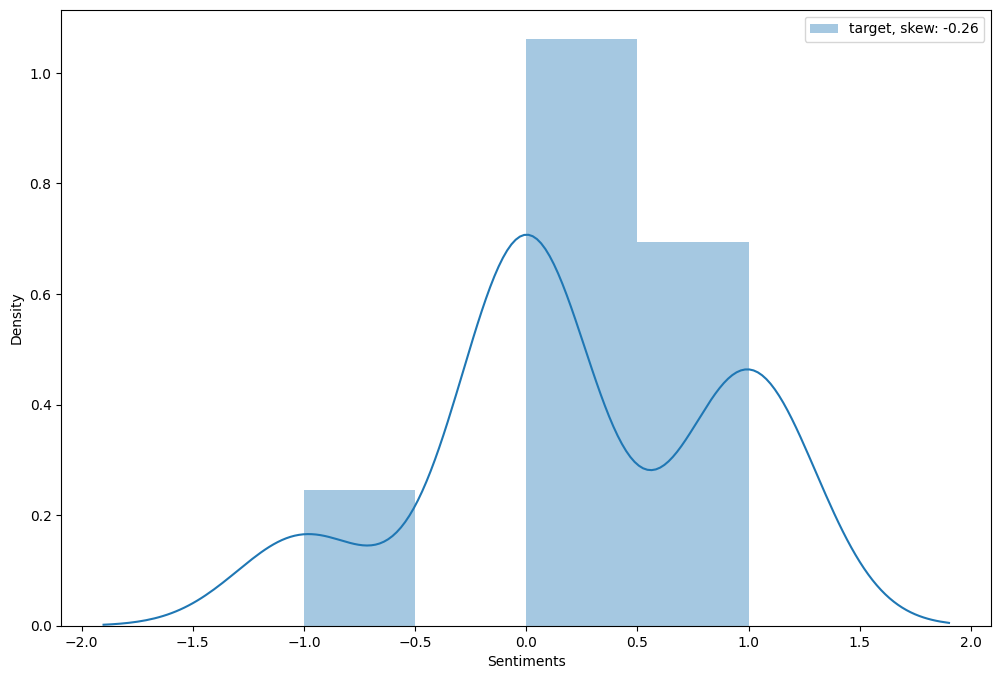

In [35]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [36]:
dataset_label.value_counts()

Sentiments
 0.0    26
 1.0    17
-1.0     6
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.metrics import recall_score

In [40]:
from sklearn.metrics import f1_score

In [41]:
from sklearn.metrics import precision_score

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
Tfidf_Vectorizer = TfidfVectorizer()

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [48]:
parameters_nb = {
                'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                #'tfidf__use_idf': (True, False),
                'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [49]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [50]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [51]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.8823529411764706
Accuracy Test set:  0.8666666666666667


In [52]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.8823529411764706
Recall Test set:  0.8666666666666667


In [53]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.788235294117647
Precision Test set:  0.756060606060606


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.8300653594771241
F1 Test set:  0.8063492063492064


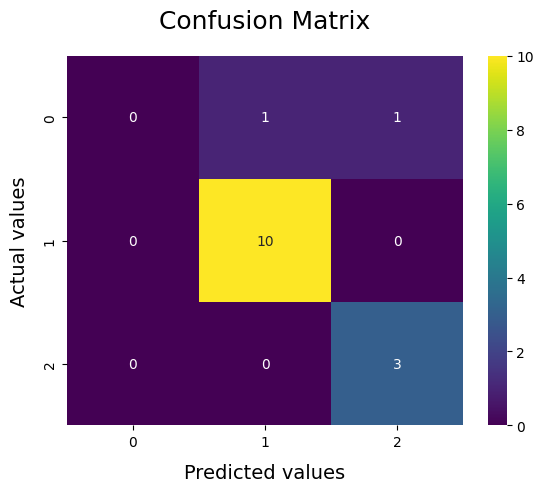

In [55]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [56]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=1))])

In [57]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 1
tfidf__ngram_range: (1, 1)


In [58]:
models = [
        ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test)
        ]

In [59]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.882353,0.866667


In [60]:
models_detail = [
                    ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test)
                ]

In [61]:
detail = pd.DataFrame(data = models_detail, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
detail

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.866667,0.866667,0.756061,0.806349


C:\Users\USER\AppData\Local\Temp\ipykernel_11604\2750282873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_11604\2750282873.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


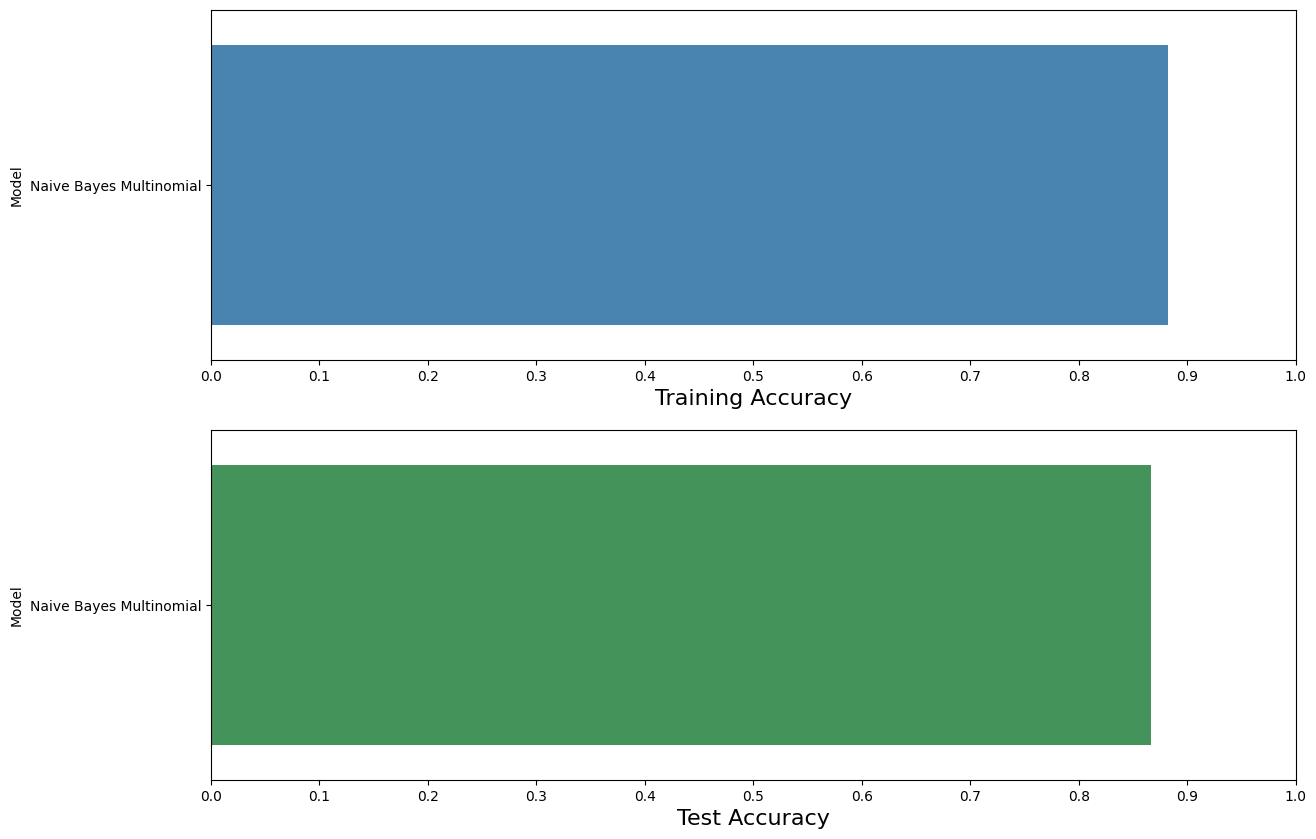

In [62]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [63]:
from sklearn.svm import SVC

In [64]:
from sklearn.pipeline import Pipeline
classifier_svc = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', SVC()),
])

In [65]:
parameters_svc = {
                'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                #'tfidf__use_idf': (True, False),
                'model__kernel' : ['linear'],
                'model__C' : [0.00001,0.0001,0.001,0.01,0.1,1,10,100],
                'model__random_state' : [42]
}

In [66]:
classifier_svm_linear = GridSearchCV(classifier_svc, parameters_svc, cv = 3, n_jobs=-1)

In [67]:
classifier_svm_linear.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                      100],
                         'model__kernel': ['linear'],
                         'model__random_state': [42],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [68]:
y_pred_svm_linear_train = classifier_svm_linear.predict(train_x)
accuracy_svm_linear_train = accuracy_score(train_label, y_pred_svm_linear_train)
print("Accuracy Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(test_x)
accuracy_svm_linear_test = accuracy_score(test_label, y_pred_svm_linear_test)
print("Accuracy Test set: ", accuracy_svm_linear_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.8666666666666667


In [69]:
recall_svm_linear_train = recall_score(train_label, y_pred_svm_linear_train, average='weighted')
print("Recall Training set: ", recall_svm_linear_train)

recall_svm_linear_test = recall_score(test_label, y_pred_svm_linear_test, average='weighted')
print("Recall Test set: ", recall_svm_linear_test)

Recall Training set:  1.0
Recall Test set:  0.8666666666666667


In [70]:
precision_svm_linear_train = precision_score(train_label, y_pred_svm_linear_train, average='weighted')
print("Precision Training set: ", precision_svm_linear_train)

precision_svm_linear_test = precision_score(test_label, y_pred_svm_linear_test, average='weighted')
print("Precision Test set: ", precision_svm_linear_test)

Precision Training set:  1.0
Precision Test set:  0.7866666666666667


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
f1_svm_linear_train = f1_score(train_label, y_pred_svm_linear_train, average='weighted')
print("F1 Training set: ", f1_svm_linear_train)

f1_svm_linear_test = f1_score(test_label, y_pred_svm_linear_test, average='weighted')
print("F1 Test set: ", f1_svm_linear_test)

F1 Training set:  1.0
F1 Test set:  0.8166666666666667


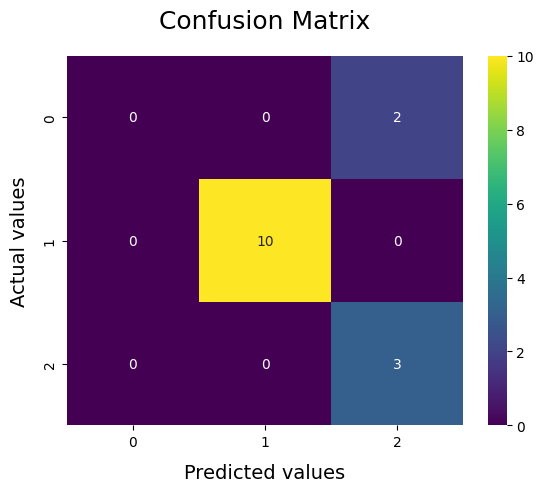

In [72]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [73]:
classifier_svm_linear.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', SVC(C=1, kernel='linear', random_state=42))])

In [74]:
for param_name in sorted(parameters_svc.keys()):
    print("%s: %r" % (param_name, classifier_svm_linear.best_params_[param_name]))

model__C: 1
model__kernel: 'linear'
model__random_state: 42
tfidf__ngram_range: (1, 1)


In [75]:
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

classifier_dt = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', DecisionTreeClassifier()),
])

In [76]:
parameters_dt = {
                "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4)],
                #"tfidf__use_idf": (True, False),
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                "model__min_samples_split": np.arange(2, 11),
                "model__criterion": ['gini','entropy'],
                "model__random_state" : [42]
}

In [77]:
classifier_dt = GridSearchCV(classifier_dt, parameters_dt, cv = 3, n_jobs=-1)

In [78]:
classifier_dt = classifier_dt.fit(train_x, train_label.ravel())

In [79]:
y_pred_dt_train = classifier_dt.predict(train_x)
accuracy_dt_train = accuracy_score(train_label, y_pred_dt_train)
print("Accuracy Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(test_x)
accuracy_dt_test = accuracy_score(test_label, y_pred_dt_test)
print("Accuracy Test set: ", accuracy_dt_test)

Accuracy Training set:  0.6470588235294118
Accuracy Test set:  0.7333333333333333


In [80]:
recall_dt_train = recall_score(train_label, y_pred_dt_train, average='weighted')
print("Recall Training set: ", recall_dt_train)

recall_dt_test = recall_score(test_label, y_pred_dt_test, average='weighted')
print("Recall Test set: ", recall_dt_test)

Recall Training set:  0.6470588235294118
Recall Test set:  0.7333333333333333


In [81]:
precision_dt_train = precision_score(train_label, y_pred_dt_train, average='weighted')
print("Precision Training set: ", precision_dt_train)

precision_dt_test = precision_score(test_label, y_pred_dt_test, average='weighted')
print("Precision Test set: ", precision_dt_test)

Precision Training set:  0.6488888888888888
Precision Test set:  0.6761904761904761


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
f1_dt_train = f1_score(train_label, y_pred_dt_train, average='weighted')
print("F1 Training set: ", f1_dt_train)

f1_dt_test = f1_score(test_label, y_pred_dt_test, average='weighted')
print("F1 Test set: ", f1_dt_test)

F1 Training set:  0.5968024132730015
F1 Test set:  0.6555555555555554


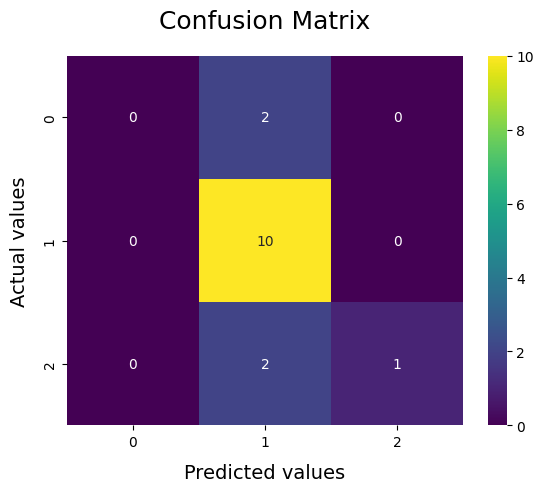

In [83]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [84]:
classifier_dt.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=1,
                                        random_state=42))])

In [85]:
for param_name in sorted(parameters_dt.keys()):
    print("%s: %r" % (param_name, classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42
tfidf__ngram_range: (1, 1)


In [86]:
models = [
        ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
        ('SVM Linear', accuracy_svm_linear_train, accuracy_svm_linear_test),
        ('Decision Tree', accuracy_dt_train, accuracy_dt_test),
        ]

In [87]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.882353,0.866667
1,SVM Linear,1.000000,0.866667
2,Decision Tree,0.647059,0.733333


In [88]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test),
                        ('SVM Linear', accuracy_svm_linear_test, recall_svm_linear_test, precision_svm_linear_test, f1_svm_linear_test),
                        ('Decision Tree', accuracy_dt_test, recall_dt_test, precision_dt_test,f1_dt_test),
                    ]

In [89]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.866667,0.866667,0.756061,0.806349
1,SVM Linear,0.866667,0.866667,0.786667,0.816667
2,Decision Tree,0.733333,0.733333,0.676190,0.655556


C:\Users\USER\AppData\Local\Temp\ipykernel_11604\2750282873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_11604\2750282873.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


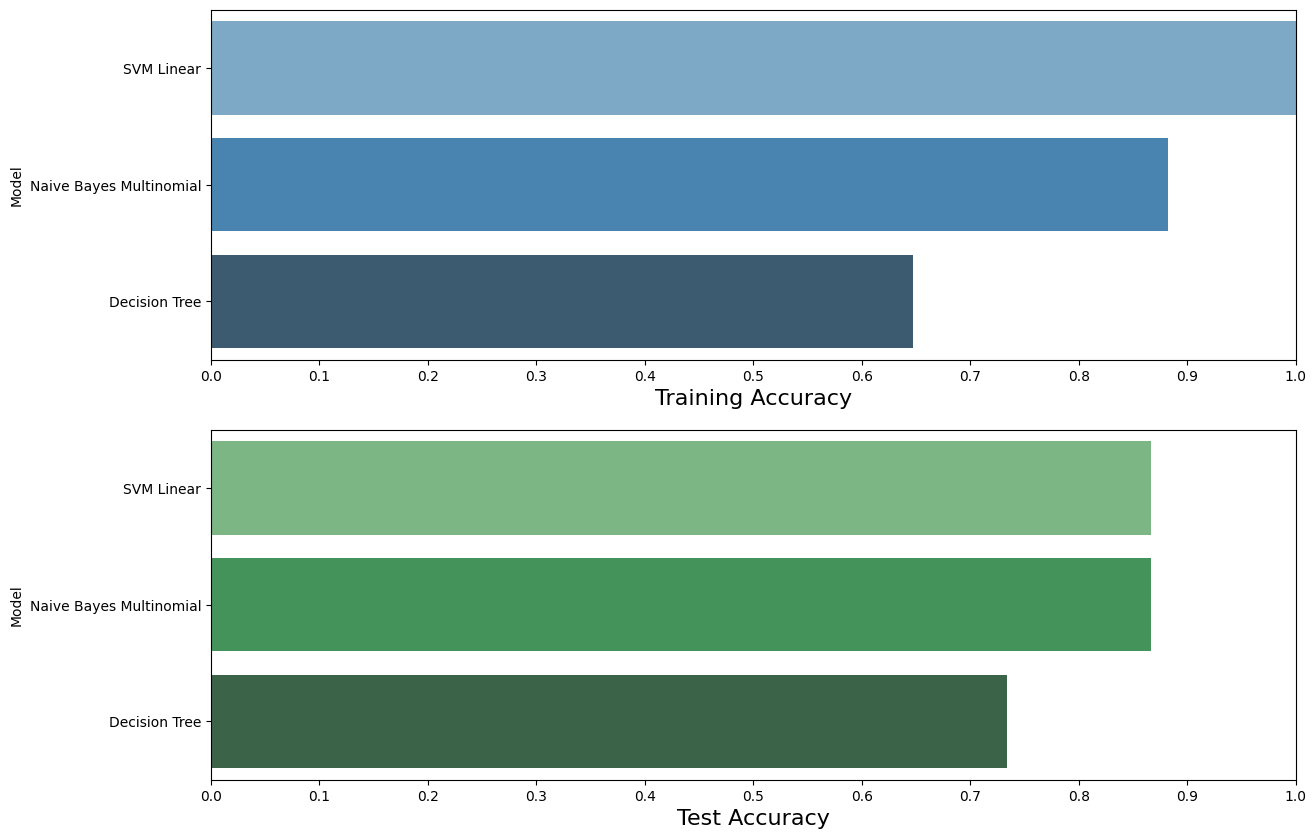

In [90]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [91]:
dataset.loc[9].ProcessedText

'taylor swift me'